# Cepstrum Coefficients

# Exercises

A. Cepstrum Coefficients
In this first part we will follow the steps to calculate the cepstrum:


\begin{equation}
c[n] = \frac{1}{2\pi} \int\limits_{-\pi}^{\pi}log|X(e^{j\omega}|e^{j\omega n}d\omega
\end{equation}


In [52]:
# to use this notebook with colab uncomment the next line
!git clone https://github.com/MTG/sms-tools.git
# and change the next line to sys.path.append('sms-tools/software/models/')
import sys
sys.path.append('sms-tools/software/models/')

fatal: destination path 'sms-tools' already exists and is not an empty directory.


In [53]:
import sys
import os
import numpy as np
import scipy
from scipy.io.wavfile import read

#sys.path.append('../software/models/')
from smstools.models import utilFunctions as UF
from scipy.signal import get_window
import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy.fftpack import fft, fftshift, ifft

Number of samples in 100ms: 1600


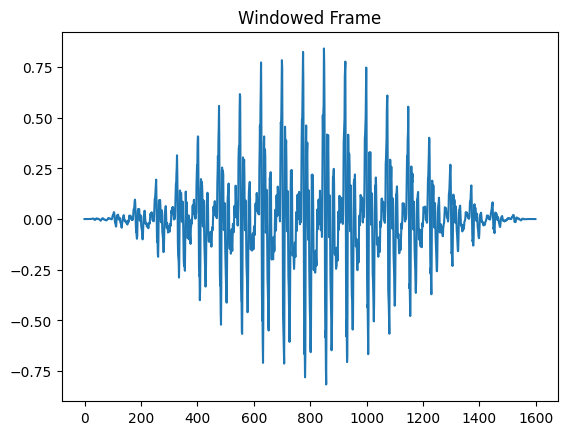

In [54]:
# Your code here
# Use  to read wav file
fs, y = scipy.io.wavfile.read('a (3).wav')
y = 0.99 * y/ np.max(np.abs(y))

N = int(0.1 * fs)  # Number of samples in 100ms
print(f"Number of samples in 100ms: {N}")

frame = y[512:512+N]
window = get_window('hann', N)
windowed_frame = frame * window

# Plot to check the frame
plt.plot(windowed_frame)
plt.title("Windowed Frame")
plt.show()


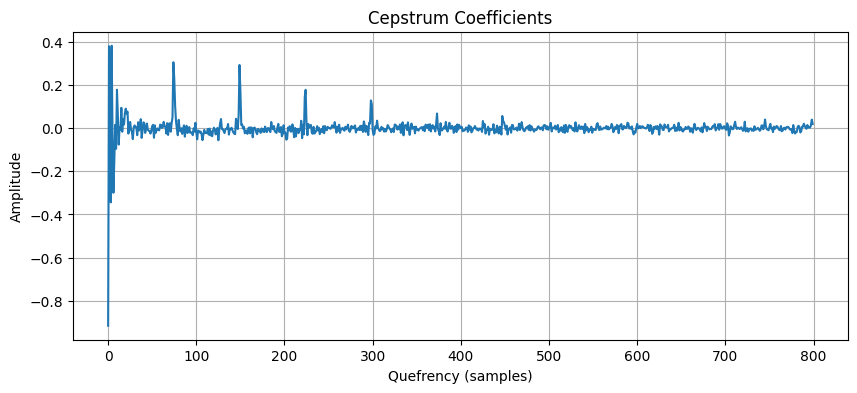

In [55]:
fft_spectrum = np.fft.fft(windowed_frame)
magnitude_spectrum = np.abs(fft_spectrum)
log_spectrum = np.log(magnitude_spectrum + 1e-10)  # Adding small value to avoid log(0)
cepstrum = np.fft.ifft(log_spectrum).real

plt.figure(figsize=(10, 4))
plt.plot(cepstrum[:N//2])  # Show only the first half (real part)
plt.xlabel("Quefrency (samples)")
plt.ylabel("Amplitude")
plt.title("Cepstrum Coefficients")
plt.grid()
plt.show()

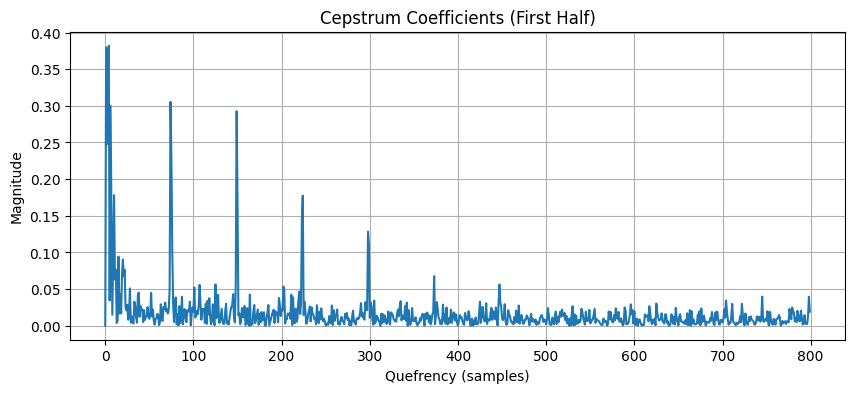

In [56]:
cepstrum[0] = 0  


# Plot Cepstrum Coefficients (first half)
plt.figure(figsize=(10, 4))
plt.plot(np.abs(cepstrum[:N//2]))  # Plot absolute values
plt.xlabel("Quefrency (samples)")
plt.ylabel("Magnitude")
plt.title("Cepstrum Coefficients (First Half)")
plt.grid()
plt.show()


#yes,  we have strong peak at low quefrency (corresponding to pitch) indicates a voiced sound.

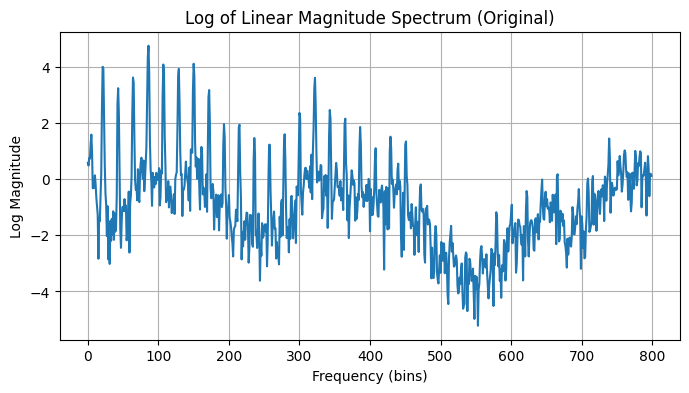

In [61]:
fs, y = scipy.io.wavfile.read('a (3).wav')

# Normalize
y = 0.99 * y / np.max(np.abs(y))

# Compute 100ms frame
N = int(0.1 * fs)
frame = y[512:512+N]

# Apply Hanning Window
window = get_window("hann", N)
windowed_frame = frame * window

# Compute FFT and log spectrum
fft_spectrum = np.fft.fft(windowed_frame, n=N)
magnitude_spectrum = np.abs(fft_spectrum)  # Get magnitude
log_magnitude_spectrum = np.log(magnitude_spectrum + 1e-10)  # Avoid log(0)

# Plot log magnitude spectrum (half only)
plt.figure(figsize=(8, 4))
plt.plot(log_magnitude_spectrum[:N//2])
plt.xlabel("Frequency (bins)")
plt.ylabel("Log Magnitude")
plt.title("Log of Linear Magnitude Spectrum (Original)")
plt.grid()
plt.show()

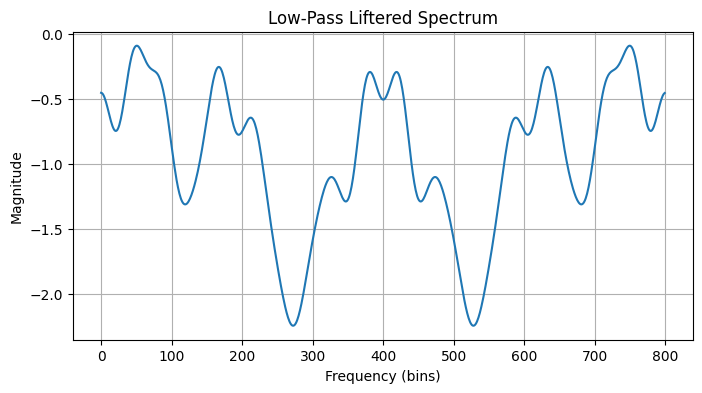

In [62]:
# Compute IFFT to get the cepstrum
cepstrum = np.fft.ifft(log_magnitude_spectrum).real

# Copy half of the cepstrum
half_cepstrum = cepstrum[:N//2].copy()

# Apply Low-Pass Liftering (keep first 20 coefficients)
lifter_cutoff = 20
lifter_mask = np.zeros_like(half_cepstrum)
lifter_mask[:lifter_cutoff] = 1  # Keep low quefrency components
cepstrum_liftered = half_cepstrum * lifter_mask


# Reconstruct the spectrum using FFT
liftered_spectrum = np.fft.fft(cepstrum_liftered)

# Plot the low-pass liftered spectrum
plt.figure(figsize=(8, 4))
plt.plot(liftered_spectrum[:N//2])
plt.xlabel("Frequency (bins)")
plt.ylabel("Magnitude")
plt.title("Low-Pass Liftered Spectrum")
plt.grid()
plt.show()


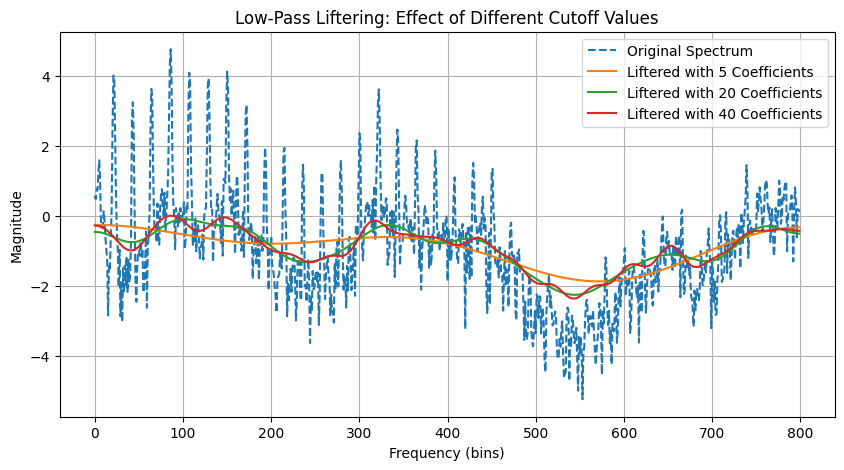

In [63]:


# Normalize
y = 0.99 * y / np.max(np.abs(y))

# Compute 100ms frame
N = int(0.1 * fs)
frame = y[512:512+N]

# Apply Hanning Window
window = get_window("hann", N)
windowed_frame = frame * window

fft_spectrum = np.fft.fft(windowed_frame, n=N)
magnitude_spectrum = np.abs(fft_spectrum)  # Get magnitude
log_magnitude_spectrum = np.log(magnitude_spectrum + 1e-10)  # Avoid log(0)

# Compute IFFT to get the cepstrum
cepstrum = np.fft.ifft(log_magnitude_spectrum).real

# Function to apply liftering and reconstruct spectrum
def liftered_spectrum(cepstrum, cutoff):
    lifter_mask = np.zeros_like(cepstrum)
    lifter_mask[:cutoff] = 1  # Keep only the first 'cutoff' coefficients
    cepstrum_liftered = cepstrum * lifter_mask
    return np.fft.fft(cepstrum_liftered) # Reconstruct the spectrum

# Compute spectra for different liftering values
spectrum_original = np.fft.fft(cepstrum)  # Original spectrum
spectrum_5 = liftered_spectrum(cepstrum, 5)
spectrum_20 = liftered_spectrum(cepstrum, 20)
spectrum_40 = liftered_spectrum(cepstrum, 40)

# Plot all results
plt.figure(figsize=(10, 5))
plt.plot(spectrum_original[:N//2], label="Original Spectrum", linestyle="dashed")
plt.plot(spectrum_5[:N//2], label="Liftered with 5 Coefficients")
plt.plot(spectrum_20[:N//2], label="Liftered with 20 Coefficients")
plt.plot(spectrum_40[:N//2], label="Liftered with 40 Coefficients")
plt.xlabel("Frequency (bins)")
plt.ylabel("Magnitude")
plt.title("Low-Pass Liftering: Effect of Different Cutoff Values")
plt.legend()
plt.grid()
plt.show()

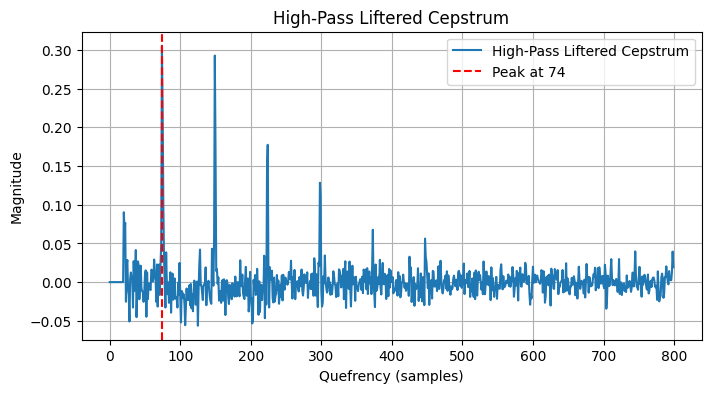

P7: Maximum peak position in the high-pass liftered cepstrum: 74
P8: Fundamental Frequency = 216.22 Hz


In [72]:

# Compute FFT and log spectrum
fft_spectrum = np.fft.fft(windowed_frame, n=N)
log_magnitude_spectrum = np.log(np.abs(fft_spectrum) + 1e-10)  # Avoid log(0)

# Compute IFFT to get the cepstrum
cepstrum = np.fft.ifft(log_magnitude_spectrum).real

# Copy half of the cepstrum (since it's symmetric)
half_cepstrum = cepstrum[:N//2].copy()

# Apply High-Pass Liftering (set first 20 coefficients to 0)
high_pass_liftered = half_cepstrum.copy()
high_pass_liftered[:20] = 0  # Remove low quefrency components (vocal tract)

# Find the position of the maximum peak (P7)
quefrency_peak_index = np.argmax(high_pass_liftered)  # P7: Find max position


fundamental_frequency = fs / quefrency_peak_index  # Convert to frequency (Hz)

# Plot High-Pass Liftered Cepstrum
plt.figure(figsize=(8, 4))
plt.plot(high_pass_liftered, label="High-Pass Liftered Cepstrum")
plt.axvline(quefrency_peak_index, color='r', linestyle="dashed", label=f"Peak at {quefrency_peak_index}")
plt.xlabel("Quefrency (samples)")
plt.ylabel("Magnitude")
plt.title("High-Pass Liftered Cepstrum")
plt.legend()
plt.grid()
plt.show()

# Print results
print(f"P7: Maximum peak position in the high-pass liftered cepstrum: {quefrency_peak_index}")
print(f"P8: Fundamental Frequency = {fundamental_frequency:.2f} Hz")